In [262]:

#Importing the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# if you would like to create all your charts with same size --> plt.rcParams["figure.figsize"] = (10, 6)

%matplotlib inline
plt.style.use('ggplot')
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [263]:
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #as model olur fakat literatür #lm = LinearRegression() #lm linear regresyon değişkeni
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score 
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [264]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

## Regularization (Scaling-(Ridge-Lasso-Elastic Net)-Feature Selection-Cross Validation-Grid Search)

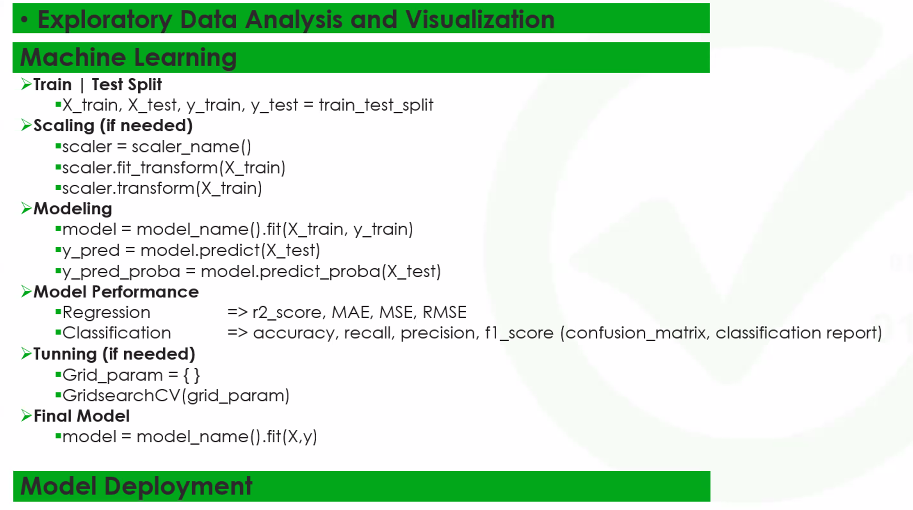

En sık kullanılan regularization metotları

L1 lasso

L2 ridge

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [266]:
df = pd.read_csv("Advertising.csv")

In [267]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [268]:
X = df.drop("sales", axis = 1) ## ilk olarak Features (bağımsız değişkenler) ve Target'ı (bağımlı değpişken) ayır
y = df["sales"]

In [269]:
from sklearn.preprocessing import PolynomialFeatures

In [270]:
polynomial_converter = PolynomialFeatures(degree = 5, include_bias = False) ## Datamı overfit li hale getiriyorum (overfitting'i anlatmak için)

poly_features = polynomial_converter.fit_transform(X)

In [271]:
poly_features.shape

(200, 55)

## Train | Test Split (Datamızı bölmeden asla fit işlemi yapmayacağız!)

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Scaling the Data

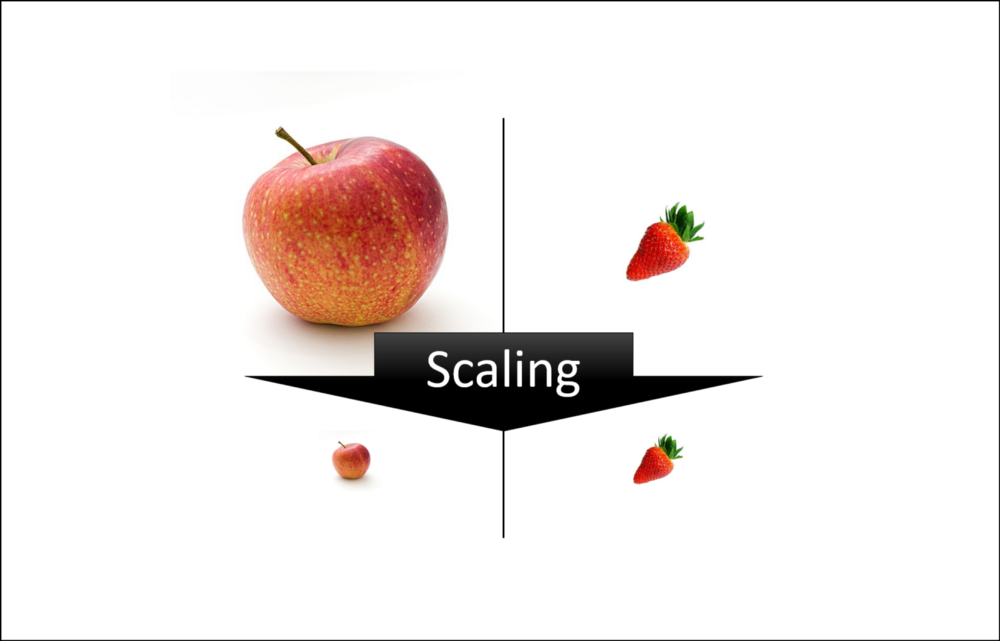

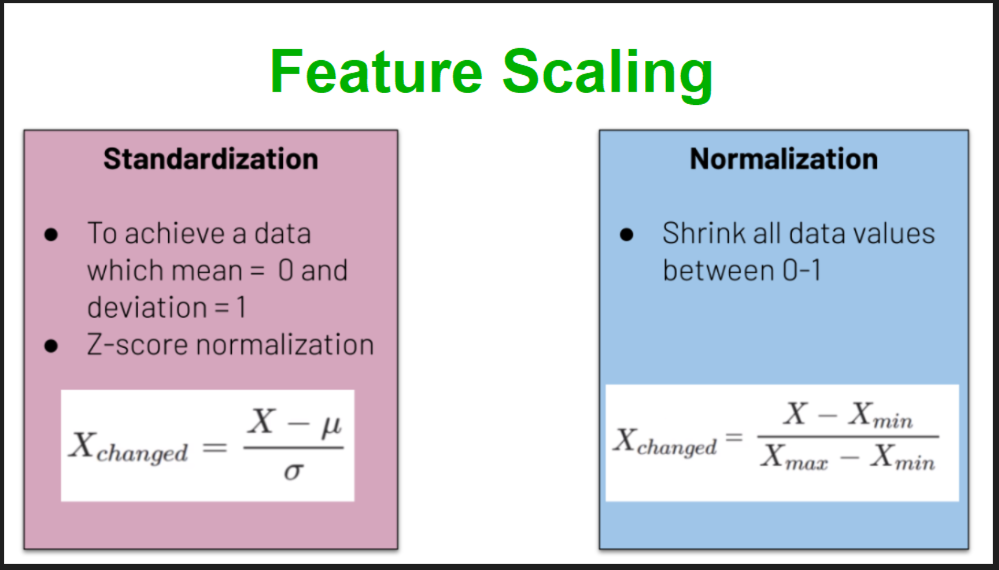

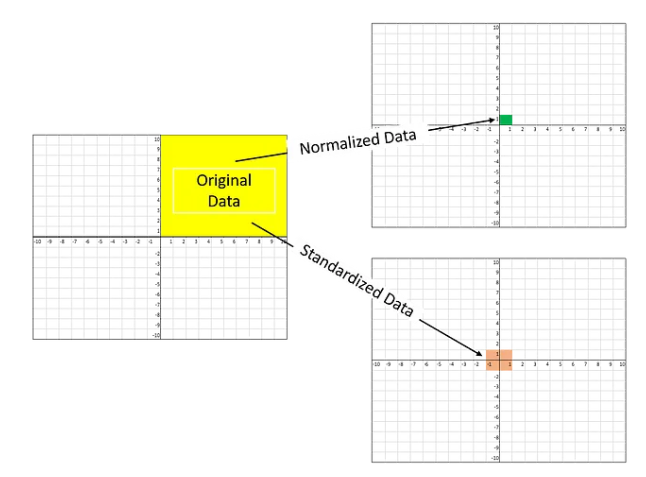

Standardizasyon: Standardizasyon, bir veri setinin özelliklerini (features) ortalaması 0 ve standart sapması 1 olacak şekilde ölçeklendirir. Bu genellikle, bir özelliğin değerlerini özelliğin ortalamasını çıkararak ve standart sapmasına bölererek gerçekleştirilir. Bu işlem, verinin normal dağılıma daha yakın hale getirir. Standardizasyon, özellikler arasındaki ölçek farklılıklarını düzeltir, bu da bazı algoritmaların (örneğin, lineer ve lojistik regresyon, destek vektör makineleri ve sinir ağları gibi) performansını artırabilir. Standardizsyonda modelimizi z skoru cinsinden yazıyoruz. Bunu yaptıktan sonra bütün featurelerimin ortalaması 0 std.sap.sı 1 olacak. Z-skoru, verileri nasıl elde ediliyor alttaki formülü mevcut ama teoriksel olarak veri noktasının ortalamadan ne kadar uzakta olduğuna göre bir skor alıyor.Ortalama ve standart sapma değerlerinin matematiksel işlemiyle z-skoru pozitif veya negatif değerler alabiliyor. Yatay eksendeki her sayı bir z-puanına karşılık gelir. z -puanı bize bir gözlemin ortalamadan(μ) kaç adet standart sapma uzak olduğunu göstermektedir.

Normalizasyon: Normalizasyon, veri setinin özelliklerini 0 ile 1 arasında bir ölçeğe getirir. Bu genellikle, bir özelliğin değerlerinden minimum değerini çıkararak ve ardından bu sonucu maksimum değer ile minimum değer arasındaki farka bölererek gerçekleştirilir. Normalizasyon, verinin belirli bir aralığa sığdırılmasını sağlar ve genellikle k-NN, K-Means ve sinir ağları gibi algoritmalar için yararlıdır, çünkü bu algoritmalar genellikle özelliklerin ölçeklerine duyarlıdır.

Her iki teknik de kendi uygulamalarına ve algoritmalara sahip olup, belirli bir durumda hangi tekniğin kullanılacağı genellikle kullanılan algoritmanın gereksinimlerine ve verinin dağılımına bağlıdır. Örneğin, verinin normal dağılıma sahip olmadığı durumlarda, normalizasyon genellikle daha iyi bir seçenek olabilir. Öte yandan, verinin normal dağılıma yakın olduğu durumlarda, standardizasyon genellikle tercih edilir.

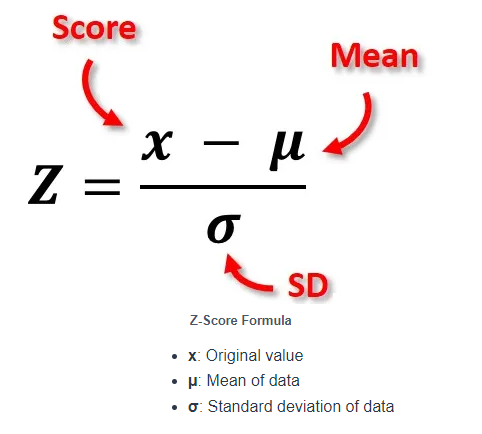

## Robust Scaler

Robust scaler : RobustScaler, adından da anlaşılabileceği gibi, veri setindeki aykırı değerlere (outliers) karşı "sağlam" bir ölçeklendirme tekniğidir. Normalleştirme veya standartlaştırma teknikleri, aykırı değerlerin varlığından ciddi şekilde etkilenebilirken, RobustScaler bu tür değerlere karşı daha dirençlidir.

RobustScaler, verinin medyanını çıkartır ve ardından veriyi birinci çeyreklik (Q1, yani 25. yüzde dilim) ve üçüncü çeyreklik (Q3, yani 75. yüzde dilim) arasındaki aralığa (interquartile range - IQR) böler. Yani:

X, ölçeklendirme yapılacak olan özelliktir. median(X), özelliğin medyan değeridir. IQR(X), özelliğin birinci çeyreklik ile üçüncü çeyreklik arasındaki farkıdır (yani Q3 - Q1). X_scaled, ölçeklendirme sonrası özelliktir. Bu teknik, özellikle aykırı değerlerin çok olduğu durumlarda yararlıdır. Çünkü medyan ve çeyreklikler, ortalama ve varyans kadar aykırı değerlerden etkilenmez. Sonuç olarak, RobustScaler verinin orijinal dağılımını korurken, aynı zamanda aykırı değerlerin etkisini azaltır.

Robust Scaler, Normalizasyon ile benzer şekilde çalışır. Aykırı değerlere sahip verilerde daha iyi sonuçlar verebilir. Yine veri dağılımı ile benzerlik gösterir ancak aykırı değerler dışarıda kalır. Medyan değeri sonradan kullanılmak üzere elenir ve değerler 1.ve 3. kartil aralığına oturtulur.

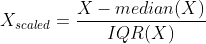

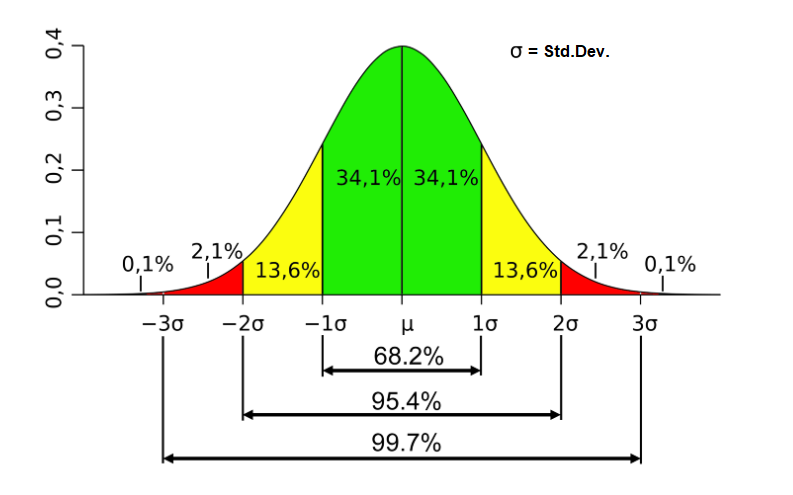

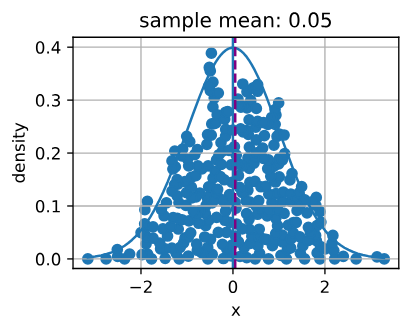

In [274]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [275]:
scaler.fit(X_train)

StandardScaler()

In [276]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled 

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [277]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled 

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [278]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() ## Sağlama adına koyduk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [279]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


## Linear Regression Model

In [280]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() #lm linear regresyon değişkeni

In [281]:
lm.fit(X_train_scaled, y_train) #x trainin scaled datasını verdim yani scale edilmiş datayı verdim.

LinearRegression()

In [282]:
y_pred = lm.predict(X_test_scaled) # y_pred alırken yine scaled edilmiş test ve train datalarını alıyoruz
y_train_pred = lm.predict(X_train_scaled)

In [283]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [284]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #modelin adı
ls      # R2 scorunda train ve test arasında varyans farkı çok fazla
# overfiting sözkonusu


,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


## Multicolineratiy

In [285]:
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for positive
    strings, black otherwise.
    """
    if val > 0.90 and val <0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color : {color}'

In [286]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

## Cross Validation

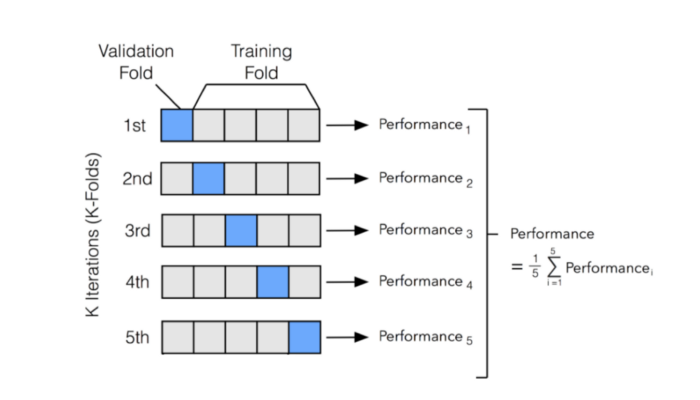

In [287]:
from sklearn.metrics import SCORERS

In [288]:
list(SCORERS.keys()) ## Cross validation sonrası ahngi skorları görmek istiyorsan kütüphanedeki isimleri burada 

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [289]:
from sklearn.model_selection import cross_validate, cross_val_score 

## Cross validation da değer olarak data seti çok büyük değil se 10 verilmeli

In [290]:
model = LinearRegression() ## Model sıfırlama
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [291]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003990,0.002385,-0.280734,-1.994430,-31.328119,-5.597153
2,0.002600,0.001994,0.993019,-0.377066,-0.250648,-0.500647
3,0.001995,0.002403,0.983934,-0.392312,-0.306241,-0.553391
4,0.002497,0.001252,0.825272,-0.979767,-4.402358,-2.098180
5,0.002084,0.001909,0.991181,-0.322253,-0.166869,-0.408496
6,0.001993,0.001995,0.969012,-0.484493,-0.976815,-0.988339
7,0.003988,0.001996,0.992885,-0.327955,-0.144808,-0.380536
8,0.004878,0.001933,0.990130,-0.447015,-0.332058,-0.576244
9,0.002992,0.001995,0.965508,-0.465024,-0.528863,-0.727230
10,0.001994,0.001996,0.990123,-0.324433,-0.197801,-0.444748


In [292]:
scores = pd.DataFrame(scores, index=range(1, 11)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()


test_r2                             0.842033
test_neg_mean_absolute_error       -0.611475
test_neg_mean_squared_error        -3.863458
test_neg_root_mean_squared_error   -1.227496
dtype: float64

Burada çıkan skor test-train skorları ile karşılaştırılacak.CV sonrası alınan skorun Train skor ile uyumlu olması mnodelin genelleme yeteneğinin olduğunu gösterir dolayısyla overfit yok demek olabilir. Ancak bu durumda test datasının datanın kötü bir bölümünden gelmiş olması (100.000 satırlık veriden 1000 satırlık bir test datası ayrıldığında) düşünülebilir bu durum söz konusu değilse yinede test datasının skoru göz önünde bulundurularak overfit durumu var denilir.



Buraya cv yi konuştupun gibi açıkla

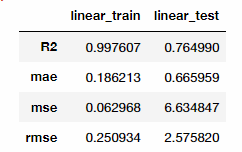

## 10 defa CV

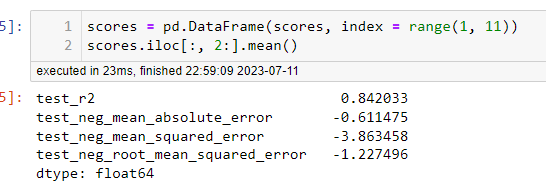

## 20 Defa CV

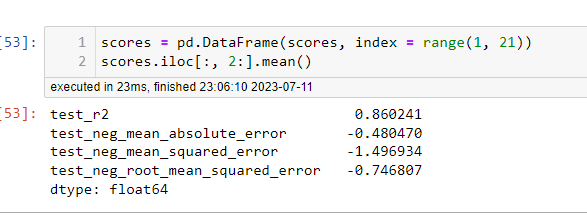

In [293]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [294]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# Regularizasyon

## Ridge Regression (L2)

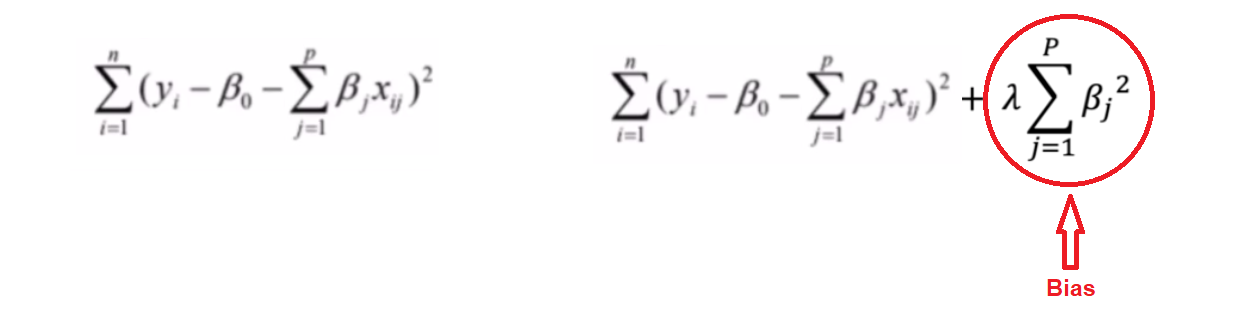

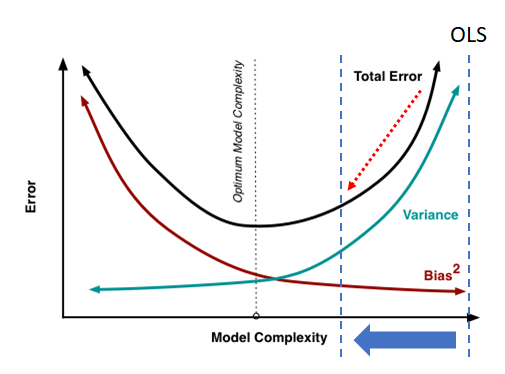

In [295]:
from sklearn.linear_model import Ridge

In [296]:
ridge_model = Ridge(alpha=1, random_state=42)

In [297]:
ridge_model.fit(X_train_scaled, y_train) #scale edilen X_train ve y_train fit ederiz

Ridge(alpha=1, random_state=42)

In [298]:
y_pred = ridge_model.predict(X_test_scaled)        
y_train_pred = ridge_model.predict(X_train_scaled)

In [299]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") # train_val fonksiyonua tahmin ve testleri veriyoruz
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


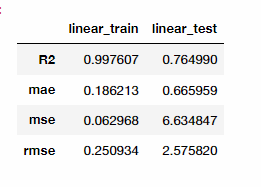

## Dikkat !!

Ridge veya Lasso sonrası overfitting sorunu çözüldüğünden asla overfit durumdan şüphemiz olmayacak.!

Ridge ve lasso sonrası eğer skorlarımda (train ve test) uyum yakınlaşma olmazsa datada kesin sorun var

In [300]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


In [301]:
model = Ridge(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train,
                      scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [302]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001995,0.002111,0.988913,-0.405789,-0.336840,-0.580379
2,0.001995,0.001996,0.969951,-0.551469,-0.677493,-0.823099
3,0.001522,0.000998,0.950978,-0.552320,-1.360795,-1.166531
4,0.000998,0.000997,0.991259,-0.365106,-0.237919,-0.487769
5,0.000998,0.001994,0.986854,-0.343011,-0.243072,-0.493023


In [303]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:, 2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

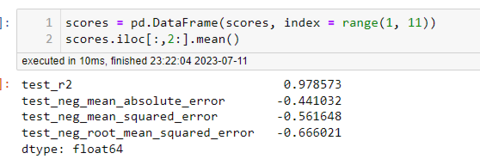

In [304]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge") ## Overfitting sorunu çözüldü

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


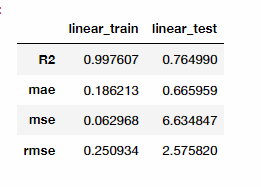

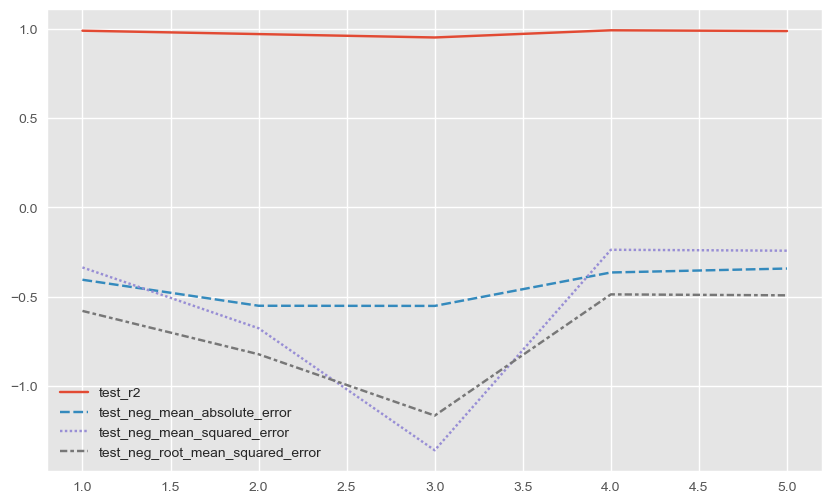

In [305]:
sns.lineplot(data = scores.iloc[:,2:]) ## Grafik halinde görmek için
plt.show()

In [306]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [307]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [308]:
pd.concat([lm_df, rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


## Choosing best alpha value with Cross-Validation

In [309]:
alpha_space = np.linspace(0.01, 1, 100) #bir kere oluştur her modelde kullan mantığıyla alpha space i oluşturduk
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [310]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [311]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [312]:
ridge_cv_model.alpha_

0.02

In [313]:
ridge_cv_model.best_score_

-0.5683736426878597

In [314]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [315]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [316]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


In [317]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445637e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460874e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199235e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [318]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns =["ridge_cv_coef_0.02"])

In [319]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


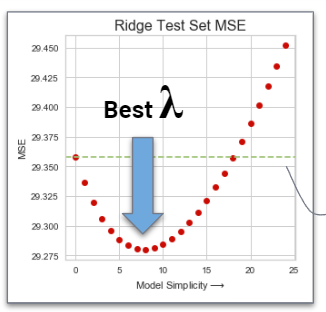

## Lasso (L1)

In [373]:
from sklearn.linear_model import Lasso, LassoCV

In [378]:
lasso_model = Lasso(alpha=1.0, random_state =42) #default alpha degeri 1'dir. Sonra oynayacagiz ayarlari ile.
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [379]:
y_train_pred = lasso_model.predict(X_train_scaled)
y_pred = lasso_model.predict(X_test_scaled)

In [380]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [381]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


In [382]:
model = Lasso(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)

In [326]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003988,0.001995,0.955947,-0.888044,-1.077594,-1.038072
2,0.002988,0.001994,0.903583,-1.372171,-3.461746,-1.860577
3,0.001994,0.001996,0.968382,-0.565185,-0.602683,-0.776327
4,0.001814,0.001520,0.938413,-0.813635,-1.551711,-1.245677
5,0.001994,0.002001,0.943817,-0.847035,-1.063069,-1.031052
6,0.001993,0.002218,0.829658,-1.304584,-5.369549,-2.317229
7,0.002249,0.001517,0.955279,-0.689034,-0.910175,-0.954031
8,0.002687,0.001996,0.857451,-1.790809,-4.795721,-2.189913
9,0.001447,0.001994,0.920257,-0.901485,-1.222707,-1.105761
10,0.001996,0.001994,0.887138,-1.218712,-2.260339,-1.503442


In [327]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.915992
test_neg_mean_absolute_error       -1.039070
test_neg_mean_squared_error        -2.231529
test_neg_root_mean_squared_error   -1.402208
dtype: float64

In [328]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [329]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [330]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


In [384]:
#alpha space is defined already above between 0 and 1, 100 as 100 numbers like 0,01 and 0,02
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state= 42) ## max iter için yapacağı her işlem bir iterasyon olduğundan bu sebeple default olan 1000 değerini yükseltmek gerekir yoksa en iyi skora inemedim hatası alabiliriz.

In [332]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000, random_state=42)

In [333]:
lasso_cv_model.alpha_

0.01

In [334]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [335]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [336]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028


In [337]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [338]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [339]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


In [340]:
def color_red_zero(val):
    """Uçan kelleler kırmızı"""
    if val == 0.0:
        color = 'red'
    else:
        color = 'black'
    return f'color : {color}'

In [341]:
pd.concat([lm_df, rm_df, rcm_df, lcm_df], axis = 1).style.applymap(color_red_zero)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,4.270214
1,-3.147845,0.689086,0.709275,0.180374
2,0.622117,0.170305,0.478838,0.139659
3,-58.348614,-0.910850,-8.015483,-3.146055
4,17.227695,2.723077,3.997813,4.153400
5,-3.875031,0.112909,-0.714940,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,-0.000000


## Elastic Net

In [342]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [343]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [344]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [345]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [346]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216


## For Elastic_Net CV with Default alpha = 1 and l1_ratio = 0.5

In [347]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [348]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.941946,-1.066213,-1.420073,-1.191668
2,0.896184,-1.412626,-3.727403,-1.930648
3,0.943570,-0.838742,-1.075660,-1.037140
4,0.912964,-1.079273,-2.192921,-1.480851
5,0.927746,-1.048461,-1.367174,-1.169262
6,0.779091,-1.710796,-6.963506,-2.638845
7,0.947015,-0.766668,-1.078353,-1.038438
8,0.828893,-2.086681,-5.756482,-2.399267
9,0.855858,-1.234090,-2.210143,-1.486655
10,0.821285,-1.669600,-3.579193,-1.891875


In [349]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.885455
test_neg_mean_absolute_error       -1.291315
test_neg_mean_squared_error        -2.937091
test_neg_root_mean_squared_error   -1.626465
dtype: float64

In [350]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [351]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [352]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [353]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


In [354]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, 
                                max_iter = 100000,random_state=42)

In [355]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [356]:
elastic_cv_model.l1_ratio_

1.0

In [357]:
elastic_cv_model.alpha_

0.01

In [358]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [359]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [360]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.896126,0.902016,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,1.248480,1.200654,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,2.733565,2.766287,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,1.653350,1.663216,0.542308,0.622028


## Grid Search

Grid search te amacımız bizim modelimizdeki hyper parametreleri grid search imize vererek bu parametrelerdeki hangi değerlerin kombinasyonunun bana o model üzerinde en iyi skoru verdiğini tespit etmeye çalışmak. Tüm kombinasyonları denediği için en iyi performans gösteren hiperparametre setini belirlemek için kullanıyoruz.

In [361]:
from sklearn.model_selection import GridSearchCV

In [362]:
elastic_model = ElasticNet(max_iter= 100000, random_state = 42)

In [363]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [364]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [365]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

[CV] END ..........................alpha=0.012, l1_ratio=0.9; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.95; total time=   0.0s
[CV] END .........................alpha=0.012, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [366]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [367]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028176,0.005612,0.000807,0.000404,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.539791,-0.657249,-0.576785,-0.708383,-0.399570,-1.638928,-0.376244,-0.601610,-0.595274,-0.425547,-0.651938,0.345295,13
1,0.005404,0.000682,0.000381,0.000470,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.518583,-0.592423,-0.480625,-0.580801,-0.385799,-1.624122,-0.374793,-0.600299,-0.611076,-0.384226,-0.615274,0.348006,10
2,0.006754,0.001711,0.000602,0.000669,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.506632,-0.553304,-0.443828,-0.593608,-0.387206,-1.597737,-0.376493,-0.590761,-0.625116,-0.361170,-0.603586,0.344045,9
3,0.008769,0.000976,0.000599,0.000489,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.472517,-0.491588,-0.401791,-0.568582,-0.381791,-1.545316,-0.367510,-0.546573,-0.609835,-0.320879,-0.570638,0.337017,4
4,0.006980,0.000438,0.000399,0.000489,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.466562,-0.480210,-0.397281,-0.568033,-0.374380,-1.526817,-0.365292,-0.530107,-0.612352,-0.314264,-0.563530,0.333562,3
5,0.007873,0.001098,0.000684,0.000451,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.461979,-0.472152,-0.394203,-0.566271,-0.370321,-1.509261,-0.365930,-0.517193,-0.617914,-0.308565,-0.558379,0.329844,2
6,0.008502,0.001924,0.000625,0.000448,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.460785,-0.470107,-0.394309,-0.565259,-0.369418,-1.505231,-0.366343,-0.513941,-0.619908,-0.307172,-0.557247,0.328976,1
7,0.021972,0.010283,0.000379,0.000468,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.564014,-0.676309,-0.579356,-0.654146,-0.404673,-1.682446,-0.380824,-0.631798,-0.584191,-0.453391,-0.661115,0.354085,14
8,0.005408,0.002708,0.000781,0.000397,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.542042,-0.612985,-0.493200,-0.601674,-0.396965,-1.659388,-0.384559,-0.634095,-0.606438,-0.410972,-0.634232,0.353567,12
9,0.005341,0.000455,0.000310,0.000475,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.532774,-0.571535,-0.455889,-0.621144,-0.401885,-1.635208,-0.387602,-0.629449,-0.625790,-0.388352,-0.624963,0.349665,11


In [368]:
grid_model.best_index_

6

In [369]:
grid_model.best_score_

-0.5572473821214591

In [370]:
y_pred = grid_model.predict(X_test_scaled) #ElasticNet(alpha=0.01, l1_ratio=0.1) olarakta yazabilirsiniz aynı anlama geliyor.
y_train_pred = grid_model.predict(X_train_scaled)

In [371]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


## Final 

In [385]:
final_scaler = StandardScaler()

In [386]:
X_scaled = final_scaler.fit_transform(poly_features)

In [387]:
final_model = Lasso(alpha=0.01)

In [389]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

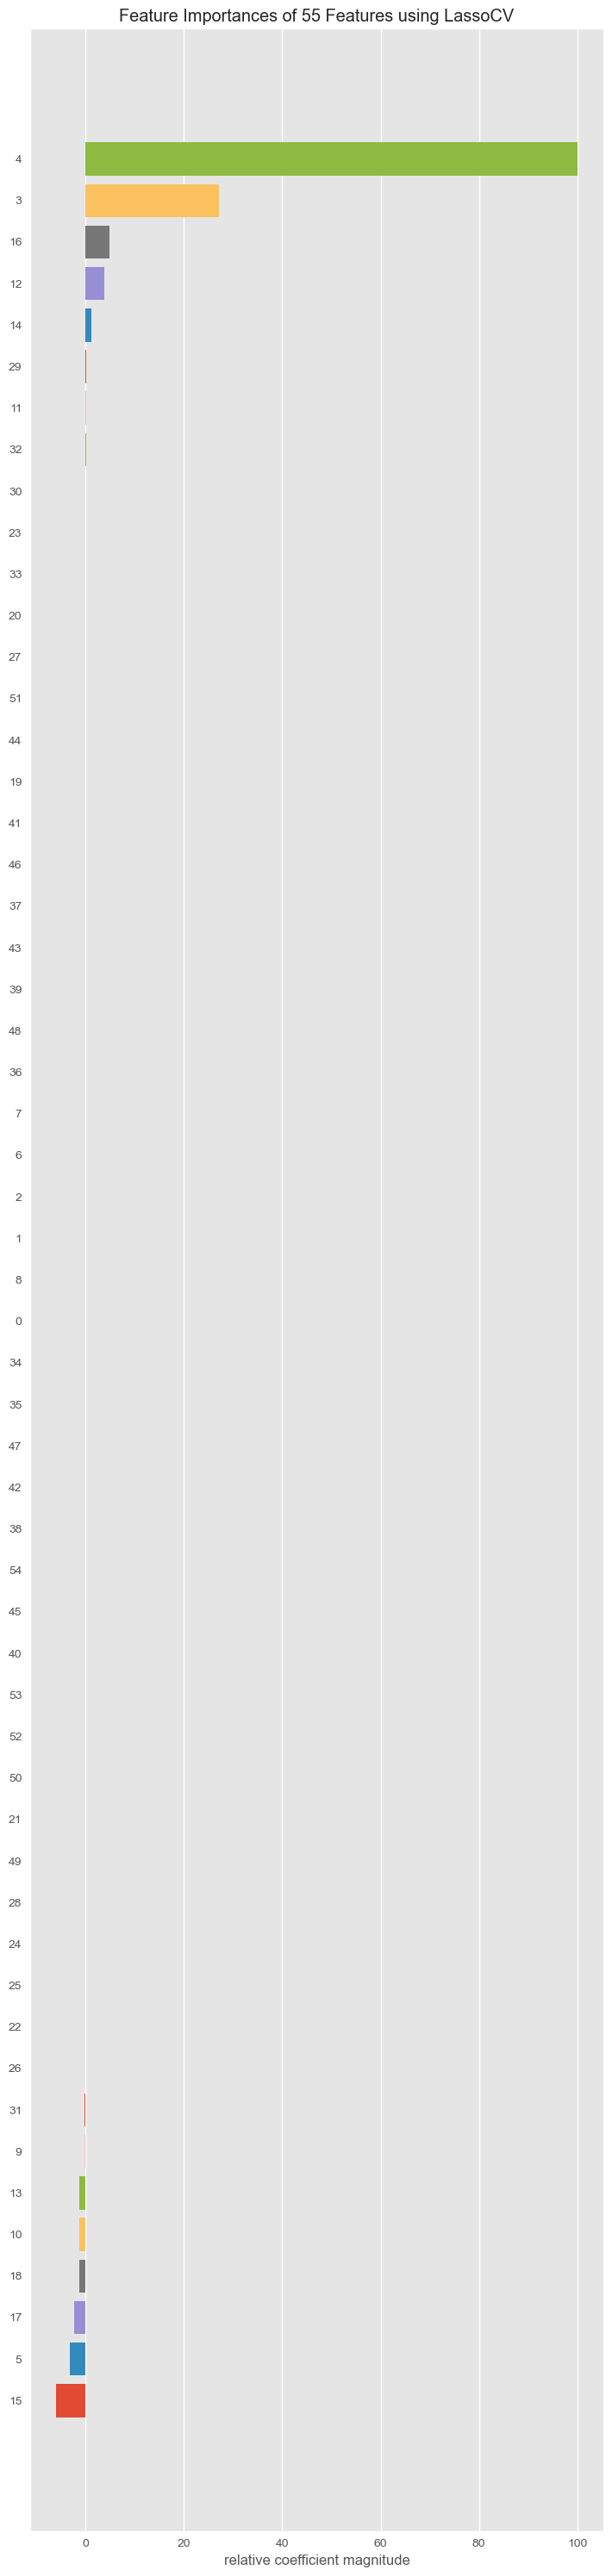

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [393]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

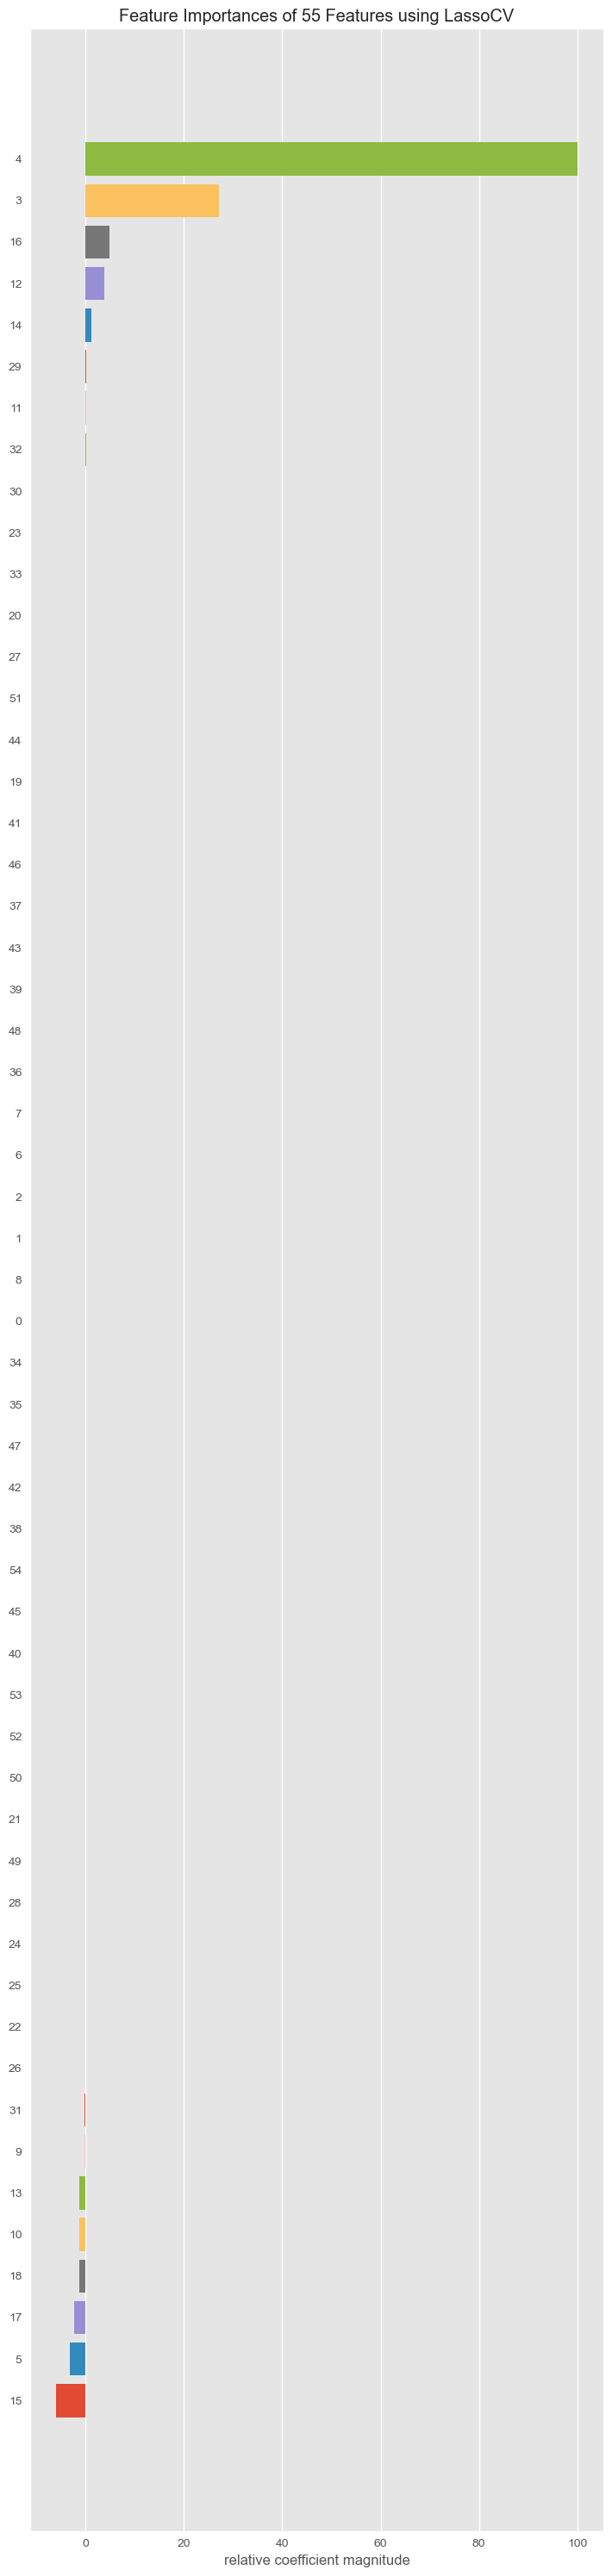

<AxesSubplot:title={'center':'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>